<a href="https://colab.research.google.com/github/Amit-Kadarmandalgi/Cognizant_Inventory-stock-percentage-prediction-using-ML/blob/main/cognizant_forage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"],inplace = True,errors = 'ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
df.timestamp

0       2022-03-02 09:51:38
1       2022-03-06 10:33:59
2       2022-03-04 17:20:21
3       2022-03-02 17:23:58
4       2022-03-05 14:32:43
               ...         
7824    2022-03-03 18:22:09
7825    2022-03-04 19:14:46
7826    2022-03-03 14:00:09
7827    2022-03-04 15:11:38
7828    2022-03-06 13:50:36
Name: timestamp, Length: 7829, dtype: object

Timestamp indicates this is just one week data in the month of march 2nd to 6th

In [ ]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


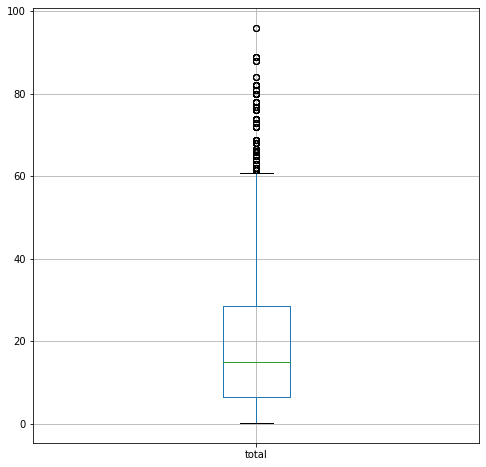

In [ ]:
df.boxplot(column="total",return_type="axes",figsize=(8,8))

Inference:
1. Total purchase value lies within 6.5 to 28.4, 1 to 4 for quantity, 4 to 7 for unit price
2. Averages for unit cost, quantity, total cost = 8,2,20 respectively

In [ ]:
import seaborn as sns

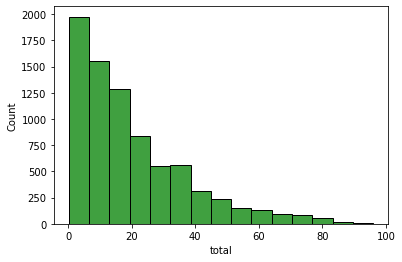

In [ ]:
sns.histplot(df.total,color = "green",bins=15)

Majority of the total bill lies from 0-20

In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

In [ ]:
get_unique_values(df, "category")

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


Perishable Items including Fruits, Vegetables.etc. contribute to 2000+ is the major type of item at the store which is sold

In [ ]:
get_unique_values(df, "product_id")

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


300 unique products

In [ ]:
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int =2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');
  plt.xticks(rotation=45)

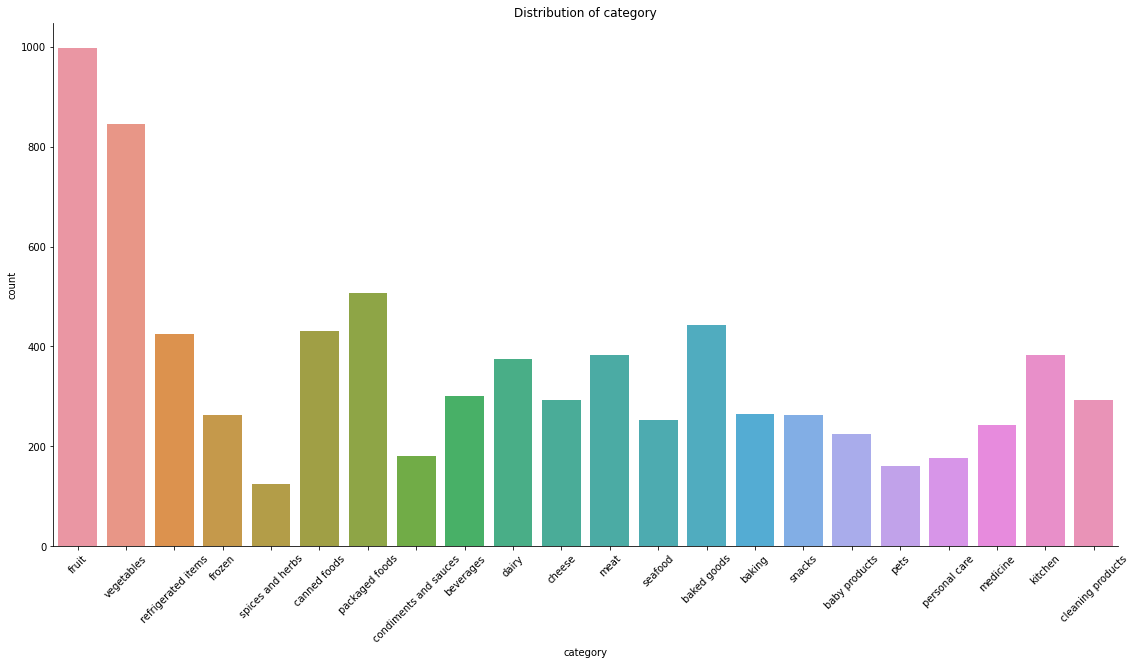

In [ ]:
plot_categorical_distribution(df,"category")

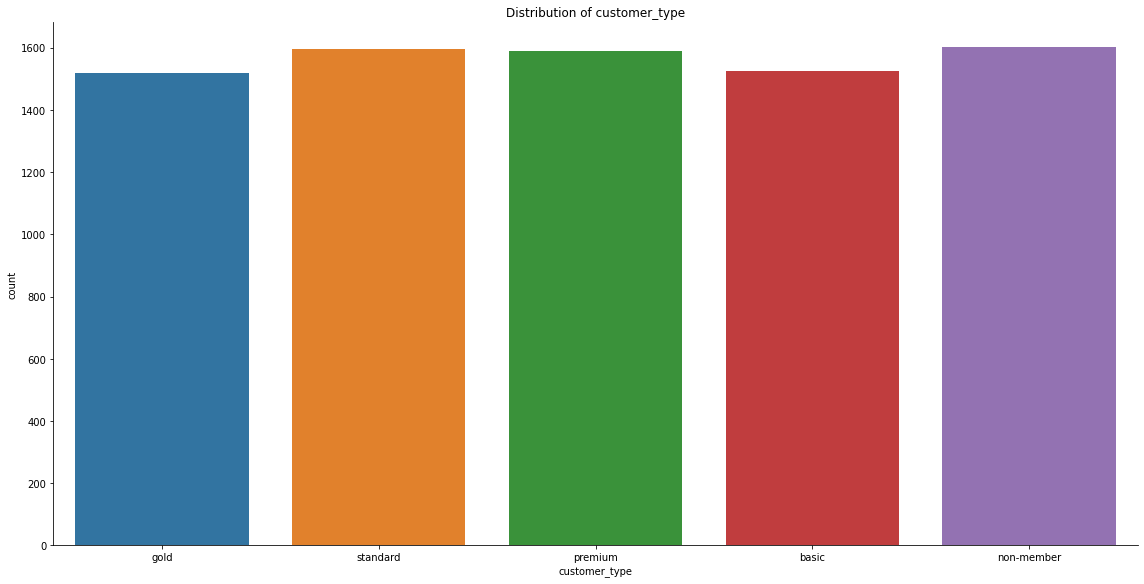

In [ ]:
plot_categorical_distribution(df,"customer_type")

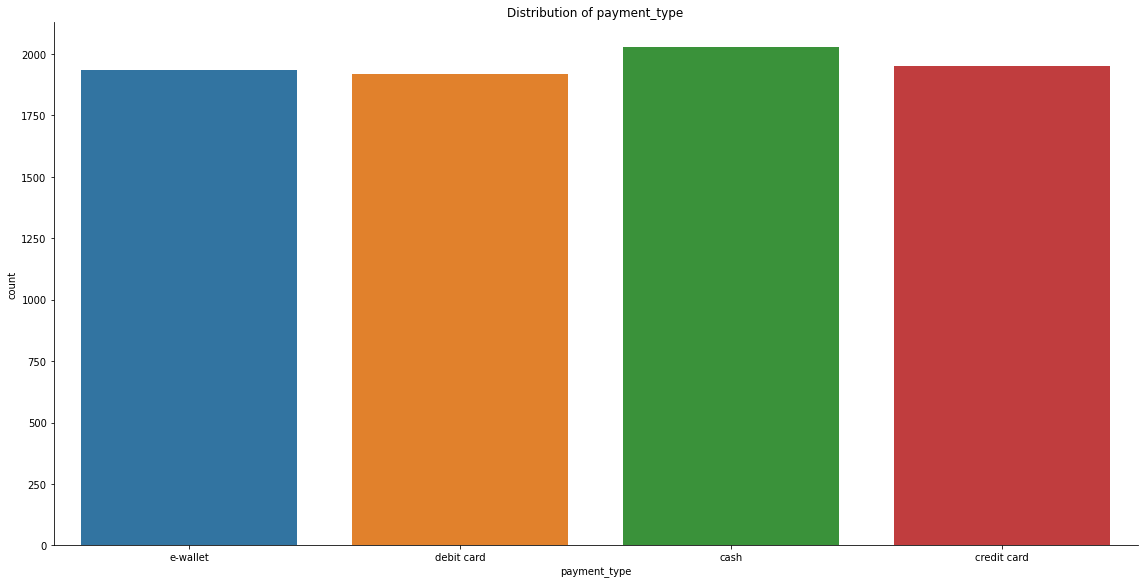

In [ ]:
plot_categorical_distribution(df,"payment_type")

Not Much can be infered based on mode of paymentor customer type as all are equally distibuted